In [30]:
# Importing the dependencies.
import os
import cv2
import random
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

[4, 3, 1, 5, 0, 9, 7, 6, 8, 2]


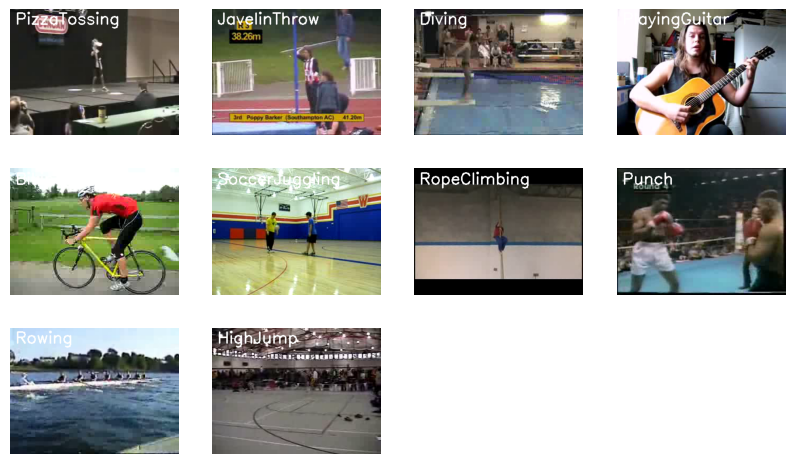

In [31]:
# Visualizing the dataset
all_classes_names = os.listdir('UCF50')

random_range = random.sample(range(len(all_classes_names)), 10)
print(random_range)

plt.figure(figsize = (10, 10))

for counter, random_index in enumerate(random_range, 1): # 1 indicates that counter starts from 1.

    selected_class_name = all_classes_names[random_index]
    video_files_names = os.listdir(f'UCF50/{selected_class_name}')

    selected_video_file_name = random.choice(video_files_names)
    video_reader = cv2.VideoCapture(f'UCF50/{selected_class_name}/{selected_video_file_name}')
    _, bgr_frame = video_reader.read()
    rgb_frame = cv2.cvtColor(bgr_frame, cv2.COLOR_BGR2RGB)
    
    cv2.putText(rgb_frame, selected_class_name, (10, 30), cv2.FONT_HERSHEY_SIMPLEX, 1, (255, 255, 255), 2)

    # Display the frame
    plt.subplot(5, 4, counter)
    plt.imshow(rgb_frame)
    plt.axis('off')

In [32]:
sequence_length = 20
class_list = ["Diving", "Punch", "Biking", "Rowing"]

In [33]:
def frames_extraction(video_path):

    frames_list = []
    video_reader = cv2.VideoCapture(video_path)
    video_frames_count = int(video_reader.get(cv2.CAP_PROP_FRAME_COUNT)) # CAP_PROP_FRAME_COUNT counts the number of frames in the video
    # print(f"No. of frames: {video_frames_count}")

    skip_frames_window = max(int(video_frames_count/sequence_length), 1)
    # print(f"Skip frames: {skip_frames_window}")

    for frame_counter in range(sequence_length):

        video_reader.set(cv2.CAP_PROP_POS_FRAMES, frame_counter * skip_frames_window) # CAP_PROP_POS_FRAMES sets the current frame position
        success, frame = video_reader.read() 

        if not success:
            break

        # Resize and normalize the frame
        resized_frame = cv2.resize(frame, (64, 64))
        normalized_frame = resized_frame / 255
        frames_list.append(normalized_frame)

    return frames_list
# frame = frames_extraction('UCF50/Diving/v_Diving_g01_c01.avi')
# print(frame)

In [34]:
def create_dataset():

    features = []
    labels = []
    video_files_paths = []

    for class_index, class_name in enumerate(class_list):

        print(f'Extracting Data of Class: {class_name}')
        files_list = os.listdir(os.path.join('UCF50', class_name))

        for file_name in files_list:

            video_file_path = os.path.join('UCF50', class_name, file_name)
            frames = frames_extraction(video_file_path)

            if len(frames) == sequence_length:
                features.append(frames)
                labels.append(class_index)
                video_files_paths.append(video_file_path)

    # Converting the list to numpy arrays
    features = np.asarray(features)
    labels = np.array(labels)

    return features, labels, video_files_paths

In [35]:
# Create the dataset
features, labels, video_files_paths = create_dataset()
print(video_files_paths)

Extracting Data of Class: Diving
Extracting Data of Class: Punch
Extracting Data of Class: Biking
Extracting Data of Class: Rowing
['UCF50\\Diving\\v_Diving_g01_c01.avi', 'UCF50\\Diving\\v_Diving_g01_c02.avi', 'UCF50\\Diving\\v_Diving_g01_c03.avi', 'UCF50\\Diving\\v_Diving_g01_c04.avi', 'UCF50\\Diving\\v_Diving_g01_c05.avi', 'UCF50\\Diving\\v_Diving_g01_c06.avi', 'UCF50\\Diving\\v_Diving_g01_c07.avi', 'UCF50\\Diving\\v_Diving_g02_c01.avi', 'UCF50\\Diving\\v_Diving_g02_c02.avi', 'UCF50\\Diving\\v_Diving_g02_c03.avi', 'UCF50\\Diving\\v_Diving_g02_c04.avi', 'UCF50\\Diving\\v_Diving_g02_c05.avi', 'UCF50\\Diving\\v_Diving_g02_c06.avi', 'UCF50\\Diving\\v_Diving_g02_c07.avi', 'UCF50\\Diving\\v_Diving_g03_c01.avi', 'UCF50\\Diving\\v_Diving_g03_c02.avi', 'UCF50\\Diving\\v_Diving_g03_c03.avi', 'UCF50\\Diving\\v_Diving_g03_c04.avi', 'UCF50\\Diving\\v_Diving_g03_c05.avi', 'UCF50\\Diving\\v_Diving_g03_c06.avi', 'UCF50\\Diving\\v_Diving_g03_c07.avi', 'UCF50\\Diving\\v_Diving_g03_c08.avi', 'UCF50\\Di

In [36]:
print(labels)

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3
 3 3 3 3 3 3 3 3 3 3 3 3 

In [37]:
from tensorflow.keras.utils import to_categorical

one_hot_encoded_labels = to_categorical(labels)
print(one_hot_encoded_labels)

[[1. 0. 0. 0.]
 [1. 0. 0. 0.]
 [1. 0. 0. 0.]
 ...
 [0. 0. 0. 1.]
 [0. 0. 0. 1.]
 [0. 0. 0. 1.]]


In [38]:

from sklearn.model_selection import train_test_split

In [39]:
# Spliting the data into train (75%) and test set (25%)
features_train, features_test, labels_train, labels_test = train_test_split(features, one_hot_encoded_labels, test_size = 0.25, shuffle = True)

In [40]:
import tensorflow as tf
from tensorflow.keras.layers import *
from tensorflow.keras.models import Sequential
from tensorflow.keras.callbacks import EarlyStopping

In [41]:
def create_CNLS_model():

    model = Sequential()
    
    model.add(TimeDistributed(Conv2D(16, (3, 3), padding='same',activation = 'relu'), input_shape = (sequence_length, 64, 64, 3)))
    model.add(TimeDistributed(MaxPooling2D((4, 4)))) 
    model.add(TimeDistributed(Dropout(0.25)))
    
    model.add(TimeDistributed(Conv2D(32, (3, 3), padding='same',activation = 'relu')))
    model.add(TimeDistributed(MaxPooling2D((4, 4))))
    model.add(TimeDistributed(Dropout(0.25)))
    
    model.add(TimeDistributed(Conv2D(64, (3, 3), padding='same',activation = 'relu')))
    model.add(TimeDistributed(MaxPooling2D((2, 2))))
    model.add(TimeDistributed(Dropout(0.25)))
    
    model.add(TimeDistributed(Conv2D(64, (3, 3), padding='same',activation = 'relu')))
    model.add(TimeDistributed(MaxPooling2D((2, 2))))
    #model.add(TimeDistributed(Dropout(0.25)))
                                      
    model.add(TimeDistributed(Flatten()))
                                      
    model.add(LSTM(32))
                                      
    model.add(Dense(len(class_list), activation = 'softmax'))

    model.summary()
    
    return model

In [42]:
# Creating the model
CNLS_model = create_CNLS_model()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 time_distributed (TimeDistr  (None, 20, 64, 64, 16)   448       
 ibuted)                                                         
                                                                 
 time_distributed_1 (TimeDis  (None, 20, 16, 16, 16)   0         
 tributed)                                                       
                                                                 
 time_distributed_2 (TimeDis  (None, 20, 16, 16, 16)   0         
 tributed)                                                       
                                                                 
 time_distributed_3 (TimeDis  (None, 20, 16, 16, 32)   4640      
 tributed)                                                       
                                                                 
 time_distributed_4 (TimeDis  (None, 20, 4, 4, 32)     0

In [43]:
# Training and optimization
early_stopping = EarlyStopping(monitor = 'val_loss', patience = 15, mode = 'min', restore_best_weights = True)
CNLS_model.compile(loss = 'categorical_crossentropy', optimizer = 'Adam', metrics = ["accuracy"])
CNLS_model_training = CNLS_model.fit(x = features_train, y = labels_train, epochs = 30, batch_size = 4 , shuffle = True, validation_split = 0.2, callbacks = [early_stopping])

Epoch 1/30
89/89 [==============================] - 22s 152ms/step - loss: 1.3078 - accuracy: 0.3708 - val_loss: 1.0731 - val_accuracy: 0.5667
Epoch 2/30
89/89 [==============================] - 9s 99ms/step - loss: 1.0442 - accuracy: 0.4944 - val_loss: 0.9883 - val_accuracy: 0.4333
Epoch 3/30
89/89 [==============================] - 9s 99ms/step - loss: 1.0281 - accuracy: 0.5028 - val_loss: 0.9902 - val_accuracy: 0.4778
Epoch 4/30
89/89 [==============================] - 9s 102ms/step - loss: 0.8360 - accuracy: 0.6404 - val_loss: 0.8124 - val_accuracy: 0.6667
Epoch 5/30
89/89 [==============================] - 10s 109ms/step - loss: 0.6664 - accuracy: 0.7303 - val_loss: 0.6061 - val_accuracy: 0.7444
Epoch 6/30
89/89 [==============================] - 10s 115ms/step - loss: 0.6759 - accuracy: 0.6826 - val_loss: 0.6019 - val_accuracy: 0.7000
Epoch 7/30
89/89 [==============================] - 8s 95ms/step - loss: 0.5346 - accuracy: 0.7809 - val_loss: 0.6528 - val_accuracy: 0.6667
Epoch 

In [44]:
# Evaluating the trained model
model_evaluation = CNLS_model.evaluate(features_test, labels_test)

5/5 [==============================] - 1s 122ms/step - loss: 0.1532 - accuracy: 0.9597


In [45]:
CNLS_model_training.history

{'loss': [1.3078023195266724,
  1.0441619157791138,
  1.028111457824707,
  0.8360183238983154,
  0.6663915514945984,
  0.6758948564529419,
  0.5345621109008789,
  0.38375309109687805,
  0.4169900119304657,
  0.40838536620140076,
  0.2599731385707855,
  0.3471872806549072,
  0.1797633022069931,
  0.2353486269712448,
  0.31878194212913513,
  0.14542223513126373,
  0.12834978103637695,
  0.10457469522953033,
  0.13255706429481506,
  0.21427591145038605,
  0.0715683102607727,
  0.04914421960711479,
  0.0525277741253376,
  0.2136082649230957,
  0.10153745859861374,
  0.04582640156149864,
  0.026986420154571533,
  0.047672368586063385,
  0.011909117922186852,
  0.009060736745595932],
 'accuracy': [0.37078651785850525,
  0.49438202381134033,
  0.5028089880943298,
  0.6404494643211365,
  0.7303370833396912,
  0.682584285736084,
  0.7808988690376282,
  0.8567415475845337,
  0.8398876190185547,
  0.8595505356788635,
  0.9101123809814453,
  0.882022500038147,
  0.9438202381134033,
  0.91573035717

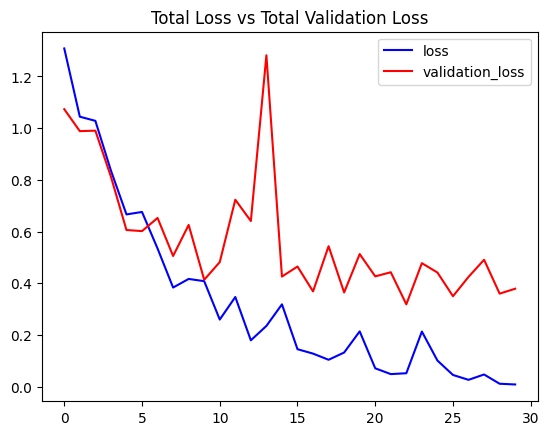

In [46]:
# Visualizing the training and validation loss
plt.plot(CNLS_model_training.history['loss'], 'blue', label = 'loss')
plt.plot(CNLS_model_training.history['val_loss'], 'red', label = 'validation_loss')
plt.title("Total Loss vs Total Validation Loss")
plt.legend()
plt.show()

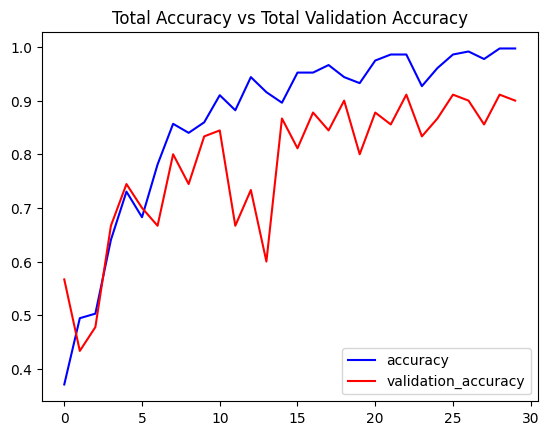

In [47]:
# Visualizing the training and validation accuracy
plt.plot(CNLS_model_training.history['accuracy'], 'blue', label = 'accuracy')
plt.plot(CNLS_model_training.history['val_accuracy'], 'red', label = 'validation_accuracy')
plt.title("Total Accuracy vs Total Validation Accuracy")
plt.legend(loc = 'lower right')
plt.show()